# Part 3: Applying Neural Nets (ANN, CNN, LSTM) to real labeled text data

For this part of the Exam, I have gathered articles on three topics: *football*, *science*, and *politics*. The data has already been cleaned, tokenized, and vectorized. Each row (vector) in the dataset is an article, each row is labeled as *football*, *science*, and *politics*. Each column is a word in the vocabulary. The data itself represents the number of times each word appear in that given article. (The data was gathered from [newsapi.org](https://newsapi.org/)).

**Here is a link to the cleaned, prepared, labeled data.**

<https://drive.google.com/file/d/1-ZAbxWN29iCo44kaLSfYmV2E8YDKcgGE/view?usp=sharing>

(If you want to know how this was done (**not required**) - here is code and a tutorial)

<https://gatesboltonanalytics.com/?page_id=254>

---

## The overall goals here include:
1. Coding, comparing, and using an ANN, CNN, and LSTM RNN in TF/Keras (Python) to Train models and to Test their accuracy.
2. You want to see if you can predict the topic of an article (in this case - *football*, *science*, and *politics*). 
3. You also want to compare and illustrate the accuracy of your models and determine/discuss which model (ANN, CNN, or LSTM) is best and why this might be.
4. **It is up to you how to do this and how best to illustrate and explain your steps, results, and conclusions. Assume the reader is non-technical.**
5. You will include a **link** to your code, but do not paste or otherwise include code on the Exam document. (Again, you can place your code wherever you want as long as there is a link to it).

## Specific requirements:

There are many ways to do this. The following offeres a few core requirements. Beyond this, **YOU must decide what to do and how best to do it.** Part of your grade will be based on your flow, discussion, illustrations, report, and communication of methods and results. Again, you will post a link to the code, but you will not include or paste code in the word doc. 

1. Use Python and TF/Keras to Train and then Test the accuracy for an ANN, CNN, and LSTM RNN. In other words, you will use three different Neural Networks to create models that should predict whether a test vector (which represents an article on a topic) is on the topic of *science*, *football*, or *politics*. You will need to write code to do this. You already have code for ANNs, CNNs, and LSTM RNNs, so you may choose to repurpose/update your code as needed. 
2. To show your work and to **illustrate and explain** your work, results, and conclusions you must include at least the following:
    
    (a) A link to your code. If you wish, you can put your code on your website, Google Colab, GitHub or wherever, an the include the URL on the word doc.
    
    (b) Show and explain how you **prepared the data** so that you can use it properly to Train and Test your models. (You are not required to validate - but you certainly can). Specifically, if you split the data, discuss and illustrate this. If you encode the labels, discuss and illustrate this, etc. Use images (like screenshots) as needed. YOU decide and explain/show what you are doing.
    
    (c) **DO NOT** include or paste any code (to Word doc). You do not need nor should you use "code" to explain or illustrate what you are doing. Use illustrations, images, explanations. Pretend that the person grading this paper does not know Python but does wan to see and understand what you did, what you found, how your models compare, which model worked best, etc.
    
    (d) TO be clear - You will be coding, training, and then testing three types of models: ANN, CNN, LSTM. Therefore, you should include screen images (small portions) of the training for each (a few of the last epochs), as well as **confusion matrices** for each that illustrate the test data accuracy for each model.
    
    (e) Discuss and describe what you are doing and showing.
    
    (f) Discuss and illustrate the results. Which model worked best (have confusion matrices that support this discussion). Comment on which model you expected to work the best, which model actually worked the best and why. 

---


In [1]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


2023-12-09 08:10:01.312972: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-09 08:10:01.518723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# %% working directory
print("current working directory:", os.getcwd())
if os.getcwd()[-15:] != "/CSCI5922/Exam3":
    src_file_dir = os.path.abspath("")          # directory holding this script file
    src_dir = os.path.dirname(src_file_dir)     # parent directory of above directory
    os.chdir(src_dir)                           # working directory should now be ".../CSCI5922/Exam3"
    print("current working directory:", os.getcwd())

current working directory: /home/jasminekobayashi/gh_repos/CSCI5922/Exam3/notebook
current working directory: /home/jasminekobayashi/gh_repos/CSCI5922/Exam3


# Data

In [3]:
# %% load data
data = pd.read_csv("data/Final_News_DF_Labeled_ExamDataset.csv")
data.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separate Features & Targets 

In [4]:
# %% features vs. targets (aka: estimators vs. predictors, input vs. output, etc.)
X = data.drop(columns=['LABEL']).to_numpy()     # features: everything except column "LABEL"
y = data[["LABEL"]]                             # targets: column "LABEL"

In [5]:
# Preview of X (first 5 rows)
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
# Preview of y
y[:5]

,LABEL
0,politics
1,politics
2,politics
3,politics
4,politics


## One Hot Encoder to Labels

In [7]:
# %% One Hot encode label
OHE = OneHotEncoder()
y = OHE.fit_transform(y).toarray()

In [8]:
OHE.categories_

[array(['football', 'politics', 'science'], dtype=object)]

In [9]:
# preview one hot encoded y
y[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Training & Testing Sets

In [10]:
# %% Training & Testing set
test_size = 0.2 # what percent of the data = testing set 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=123)

In [11]:
# preview X_train (first 5 rows)
X_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
# preview y_train
y_train[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
# test inverse transform of One-Hot Encoder
OHE.inverse_transform(y_train[:5])

array([['politics'],
       ['science'],
       ['politics'],
       ['football'],
       ['football']], dtype=object)

In [14]:
# preview X_test
X_test[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
# preview y_test
y_test[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [16]:
# preview OHE inverse transform on y_test
OHE.inverse_transform(y_test[:5])

array([['science'],
       ['politics'],
       ['politics'],
       ['politics'],
       ['football']], dtype=object)

# Models

There are some portions of the code that could be relatively repetitive, so rather than just constantly copy and pasting cell codes, I created the following class to help with some redundancy.

The class is built so that after building the model, the desired model to be evaluated is passed into the class when instantiated (and the model summary is outputted during instantiation).

It contains functions that simplify some repetitive process with parameters to change the small details to give flexibility to change if needed depending on the model. Some function may default to have some useful informative outputs (like what loss function was used, data previews, etc.). 

In [17]:
class exam_model_eval:
    def __init__(self,NN_model,
                 model_name = 'NN Model',
                 X_train=X_train,
                 X_test=X_test,
                 y_train=y_train,
                 y_test=y_test,
                 OHE=OHE):
        self.NN_model = NN_model
        self.model_name = model_name
        self.OHE = OHE
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.labeled_y_train = self.OHE.inverse_transform(self.y_train) #likely not needed, but potentially useful
        self.y_test = y_test
        self.labeled_y_test = self.OHE.inverse_transform(self.y_test)

        # print model summary
        print(self.NN_model.summary())


    def compile_model(self, 
                      loss = tf.keras.losses.CategoricalCrossentropy(),
                      metrics = keras.metrics.CategoricalAccuracy(),
                      optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001)):
        self.NN_model.compile(loss=loss,
                              metrics = metrics,
                              optimizer = optimizer)
        print("Model was compiled (using following parameters):")
        print("Loss Function =",str(loss))
        print("Accuracy Metric =",str(metrics))
        print("Optimizer =",str(optimizer))
        

    def train_model(self,epochs = 10):
        self.hist = self.NN_model.fit(self.X_train,
                                         self.y_train,
                                         epochs = epochs,
                                         validation_data =(self.X_test,self.y_test))

    def accuracy_plot(self,
                      title = "Accuracy over all Epochs"):
        # Accuracy plot
        plt.plot(self.hist.history['categorical_accuracy'], label='accuracy')
        plt.plot(self.hist.history['val_categorical_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(title+" for {}".format(self.model_name))

        #plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.show()

    def loss_plot(self,
                  title = "Loss over all epochs"):
        # Loss plot
        plt.plot(self.hist.history['loss'], label='loss')
        plt.plot(self.hist.history['val_loss'], label = 'val_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(title+" for {} ".format(self.model_name))
        #plt.ylim([0.5, 1])
        plt.legend(loc='lower right')

    def test_model(self,verbose=True):
        self.prediction = self.NN_model.predict(self.X_test)
        self.labeled_prediction = self.OHE.inverse_transform(self.prediction)
        self.eval_loss,self.eval_acc = self.NN_model.evaluate(self.X_test,self.y_test)
        
        if verbose:
            print("\nModel Loss from testing:")
            print(self.eval_loss)

            print("\nModel Accuracy from testing:")
            print(self.eval_acc)

            print("\nPreview of model prediction (raw):")
            print(self.prediction[:5])

            print("\nPreview of predictions labeled:")
            print(self.labeled_prediction[:5])

    def pretty_confusion_matrix(self,
                                title='Confusion Matrix'):

        cm = confusion_matrix(self.labeled_prediction,self.labeled_y_test)
        
        fig, ax = plt.subplots() 
        sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
        ax.set_xlabel('True labels') 
        ax.set_ylabel('Predicted labels')
        ax.xaxis.set_ticklabels(self.OHE.categories_[0].tolist())
        ax.yaxis.set_ticklabels(self.OHE.categories_[0].tolist())
        ax.set_title(title+" of {} Prediction Performance".format(self.model_name)) 
        plt.show()


2023-12-09 08:10:05.160186: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


# ANN

In [18]:
ANN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'), 
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(.5), 
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(.5), 
  tf.keras.layers.Dense(3, activation='softmax')
  
])

ANN_model(X_train)

<tf.Tensor: shape=(1194, 3), dtype=float32, numpy=
array([[0.3300434 , 0.356171  , 0.31378558],
       [0.34470907, 0.3285148 , 0.32677612],
       [0.34228167, 0.33214647, 0.3255718 ],
       ...,
       [0.3256445 , 0.33537427, 0.33898118],
       [0.32849354, 0.33508915, 0.3364173 ],
       [0.3455695 , 0.32604873, 0.3283818 ]], dtype=float32)>

In [19]:
my_ANN = exam_model_eval(ANN_model,model_name="ANN_model") #the init of this class prints the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1194, 32)                9632      
                                                                 
 dense_1 (Dense)             (1194, 16)                528       
                                                                 
 dropout (Dropout)           (1194, 16)                0         
                                                                 
 dense_2 (Dense)             (1194, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (1194, 8)                 0         
                                                                 
 dense_3 (Dense)             (1194, 3)                 27        
                                                                 
Total params: 10,323
Trainable params: 10,323
Non-traina

In [20]:
my_ANN.compile_model()

Model was compiled (using following parameters):
Loss Function = <keras.losses.CategoricalCrossentropy object at 0x7f5f4d4b2fd0>
Accuracy Metric = CategoricalAccuracy(name=categorical_accuracy,dtype=float32)
Optimizer = <keras.optimizers.legacy.adam.Adam object at 0x7f5f4d4cb310>


In [21]:
%%time
my_ANN.train_model(epochs=100)

Epoch 1/100
38/38 [==============================] - 1s 13ms/step - loss: 1.0870 - categorical_accuracy: 0.3626 - val_loss: 1.0778 - val_categorical_accuracy: 0.3913
Epoch 2/100
25/38 [==================>...........] - ETA: 0s - loss: 1.0733 - categorical_accuracy: 0.4000

38/38 [==============================] - 0s 6ms/step - loss: 1.0726 - categorical_accuracy: 0.3802 - val_loss: 1.0542 - val_categorical_accuracy: 0.5485
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 1.0500 - categorical_accuracy: 0.4162 - val_loss: 1.0248 - val_categorical_accuracy: 0.5953
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 1.0257 - categorical_accuracy: 0.4271 - val_loss: 0.9781 - val_categorical_accuracy: 0.6455
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.9868 - categorical_accuracy: 0.4791 - val_loss: 0.9164 - val_categorical_accuracy: 0.6622
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.9497 - categorical_accuracy: 0.4874 - val_loss: 0.8637 - val_categorical_accuracy: 0.6722
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.9037 - categorical_accuracy: 0.5126 - val_loss: 0.8090 - val_categorical_accuracy: 0.6890
Epoch 8/100
38/38 [===

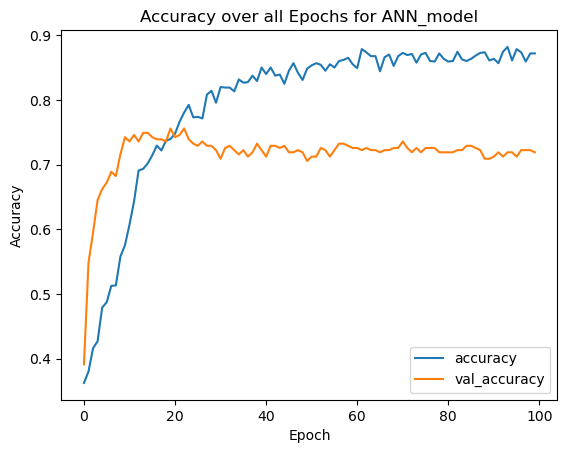

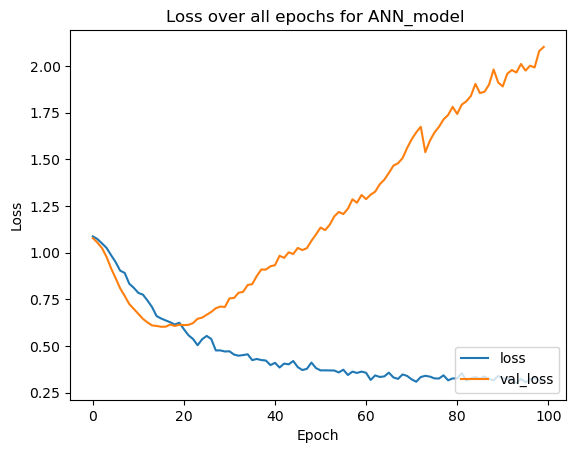

In [22]:
my_ANN.accuracy_plot()
my_ANN.loss_plot()

In [23]:
my_ANN.test_model(verbose=True)

10/10 [==============================] - 0s 4ms/step - loss: 2.1013 - categorical_accuracy: 0.7191

Model Loss from testing:
2.1013288497924805

Model Accuracy from testing:
0.7190635204315186

Preview of model prediction (raw):
[[2.41240965e-08 5.36647385e-05 9.99946356e-01]
 [7.39151597e-01 1.22635566e-01 1.38212845e-01]
 [8.89783332e-05 8.46713036e-02 9.15239632e-01]
 [1.66180371e-06 9.77494055e-04 9.99020815e-01]
 [1.00000000e+00 7.61282237e-09 4.10697904e-18]]

Preview of predictions labeled:
[['science']
 ['football']
 ['science']
 ['science']
 ['football']]


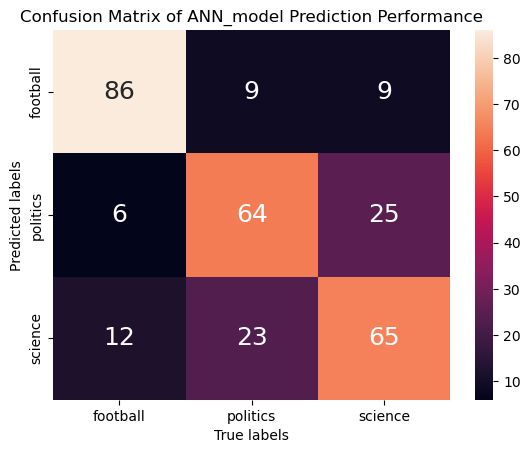

In [24]:
my_ANN.pretty_confusion_matrix()

# CNN

In [25]:
CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(50,input_shape = (X_train.shape[1],1), kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Conv1D(40, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Conv1D(30, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Conv1D(30, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Flatten(),
 
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Dense(3, activation='softmax')
])

In [26]:
my_CNN = exam_model_eval(CNN_model,model_name="CNN Model")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 298, 50)           200       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 40)           6040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 73, 40)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 71, 30)            3630      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 35, 30)          

In [27]:
my_CNN.compile_model()

Model was compiled (using following parameters):
Loss Function = <keras.losses.CategoricalCrossentropy object at 0x7f5f4d4b2fd0>
Accuracy Metric = CategoricalAccuracy(name=categorical_accuracy,dtype=float32)
Optimizer = <keras.optimizers.legacy.adam.Adam object at 0x7f5f4d4cb310>


In [28]:
%%time
my_CNN.train_model(epochs=100)

Epoch 1/100


38/38 [==============================] - 2s 26ms/step - loss: 0.9770 - categorical_accuracy: 0.5338 - val_loss: 0.8775 - val_categorical_accuracy: 0.5518
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.8273 - categorical_accuracy: 0.6089 - val_loss: 0.7695 - val_categorical_accuracy: 0.6589
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.7188 - categorical_accuracy: 0.6901 - val_loss: 0.7521 - val_categorical_accuracy: 0.6756
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.6638 - categorical_accuracy: 0.7236 - val_loss: 0.7218 - val_categorical_accuracy: 0.6656
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.6349 - categorical_accuracy: 0.7211 - val_loss: 0.7204 - val_categorical_accuracy: 0.6789
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.5935 - categorical_accuracy: 0.7613 - val_loss: 0.7371 - val_categorical_accuracy: 0.6689
Epoch 7/100
38/3

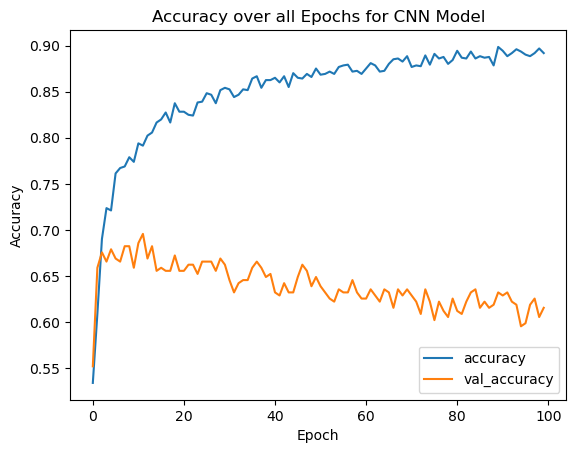

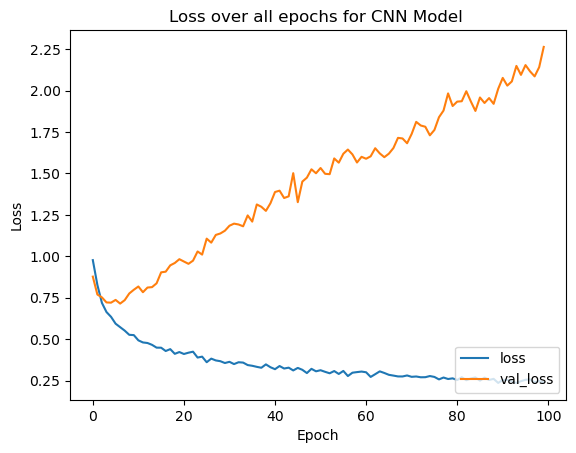

In [29]:
my_CNN.accuracy_plot()
my_CNN.loss_plot()

In [30]:
my_CNN.test_model(verbose=True)

10/10 [==============================] - 0s 9ms/step - loss: 2.2634 - categorical_accuracy: 0.6154

Model Loss from testing:
2.2634103298187256

Model Accuracy from testing:
0.6153846383094788

Preview of model prediction (raw):
[[7.7730551e-11 4.8919252e-01 5.1080751e-01]
 [9.9999237e-01 1.7660898e-07 7.5296120e-06]
 [7.5577808e-12 9.9478805e-01 5.2119363e-03]
 [4.5641782e-15 6.2511762e-04 9.9937493e-01]
 [1.0000000e+00 9.3140293e-15 8.4318382e-16]]

Preview of predictions labeled:
[['science']
 ['football']
 ['politics']
 ['science']
 ['football']]


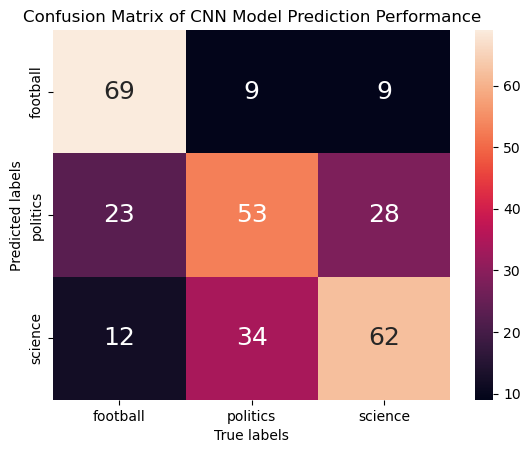

In [31]:
my_CNN.pretty_confusion_matrix()

# LSTM